# QUIZ 2
Vihlai Maldonado Cuevas - 201619479

In [160]:
!pip install --upgrade pandas-profiling
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import seaborn as sns

In [162]:
data_df = pd.read_csv('insurance.csv')

In [163]:
data_df.shape

(1338, 7)

In [164]:
data_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [165]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [166]:
data_df = data_df.drop_duplicates()

In [167]:
data_df.shape

(1337, 7)

## Procesamiento

In [168]:
data_df['sex'] = data_df['sex'] .replace({'female': 1, 'male': 0})
data_df['smoker'] = data_df['smoker'] .replace({'yes': 1, 'no': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [169]:
region_dummies = pd.get_dummies(data_df['region'], prefix='region_')
data_df = pd.concat([data_df, region_dummies], axis = 1).drop('region', axis=1)

In [170]:
data_df.head()

,age,sex,bmi,children,smoker,charges,region__northeast,region__northwest,region__southeast,region__southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


Variable objetivo:

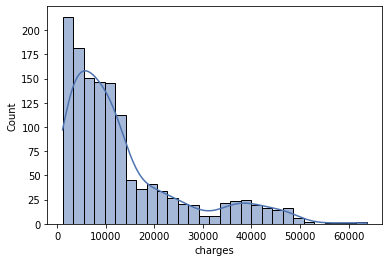

In [171]:
sns.histplot(data_df['charges'], kde=True)

In [172]:
data_df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

División datos de entrenamiento y test:

In [195]:
X=data_df.drop('charges', axis=1)
Y=data_df['charges']

In [196]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [197]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## a. Modelo de regresión lineal

In [198]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, Y_train)

LinearRegression()

In [199]:
lin_reg.coef_

array([3579.52257131,  260.80993236, 2324.12976783,  694.23180037,
       9784.79290277,  296.8140035 ,   92.84819927, -297.93896863,
        -82.54735287])

In [178]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region__northeast',
       'region__northwest', 'region__southeast', 'region__southwest'],
      dtype='object')

In [179]:
lin_reg.intercept_

13631.418931682883

### Evaluación del modelo

In [180]:
preds_train = lin_reg.predict(X_train_scaled)
preds_test = lin_reg.predict(X_test_scaled)

In [181]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(4362.80036112836, 3924.636038021783)

In [182]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(6145.32833487281, 5689.308291189106)

In [183]:
np.sqrt(mean_squared_error(Y_train, preds_train))/Y_test.mean()

0.5175503499630278

In [184]:
np.sqrt(mean_squared_error(Y_test, preds_test))/Y_test.mean()

0.4791450247569921

In [185]:
mean_squared_error(Y_train, preds_train), mean_squared_error(Y_test, preds_test)

(37765060.34339062, 32368228.832193103)

In [186]:
r2_score(Y_test, preds_test)

0.7497814388540701

I. ¿Es aceptable el error obtenido?\
Esto dependería de los requerimientos del negocio, pero si tomamos como métrica el MAE y el valor mayor de `charges`, que es 63770, vemos que el error en términos porcentuales respecto al valor máximo de `charges` es inferior al 10%. En todo caso este modelo puede ser mejorado incrementando su complejidad y añadiendo regularización para prevenir overfitting.

II. ¿Hay evidencia de overfitting? \
De acuerdo a la métrica MAE se observa que se tuvo un mejor desempeño en los datos de test que en los de entrenamiento, por lo cual no se evidencia el sobreajuste en el modelo. Asimismo, esto es consistente con la métrica RMSE y MSE.



In [187]:
3924*100/63770

6.153363650619413

## b. Modelo de regresión polinomial

Regresión Ridge:

In [188]:
for model_degree in [2, 3, 4, 5, 6]:
  print("Modelo de regresión polinomial grado: ", model_degree)
  poly_features = PolynomialFeatures(degree=model_degree, include_bias=False)
  for alpha in [0.01, 0.1, 1, 10, 100]:
    x_train_poly = poly_features.fit_transform(X_train_scaled)
    x_test_poly = poly_features.fit_transform(X_test_scaled)
    ridge_reg = Ridge(alpha=alpha, solver='cholesky')
    ridge_reg.fit(x_train_poly, Y_train)
    ridge_preds_train = ridge_reg.predict(x_train_poly)
    ridge_preds_test = ridge_reg.predict(x_test_poly)
    print("Desempeño en datos de test, alpha = ", alpha)
    print('MAE: ', mean_absolute_error(Y_test, ridge_preds_test))
    print('MSE: ', mean_squared_error(Y_test, ridge_preds_test))
    print('RMSE: ', np.sqrt(mean_squared_error(Y_test, ridge_preds_test)))

Modelo de regresión polinomial grado:  2
Desempeño en datos de test, alpha =  0.01
MAE:  2667.741727502817
MSE:  21773198.47024501
RMSE:  4666.176000778904
Desempeño en datos de test, alpha =  0.1
MAE:  2667.7969280340867
MSE:  21772645.79812502
RMSE:  4666.116779306431
Desempeño en datos de test, alpha =  1
MAE:  2668.356110945344
MSE:  21767168.885217864
RMSE:  4665.529861143091
Desempeño en datos de test, alpha =  10
MAE:  2674.5362719015357
MSE:  21717281.383471914
RMSE:  4660.180402459964
Desempeño en datos de test, alpha =  100
MAE:  2773.3108955501066
MSE:  21623470.959840335
RMSE:  4650.104403111863
Modelo de regresión polinomial grado:  3
Desempeño en datos de test, alpha =  0.01
MAE:  3000.0143579760775
MSE:  24330439.493221916
RMSE:  4932.589532205362
Desempeño en datos de test, alpha =  0.1
MAE:  2999.9348123878626
MSE:  24329398.998702444
RMSE:  4932.484059650112
Desempeño en datos de test, alpha =  1
MAE:  2999.140774877021
MSE:  24319037.811076056
RMSE:  4931.43364662610

De acuerdo al resultado anterior observamos que a un mayor grado del polinomio el error en los datos de test es más alto, lo cual implica que el modelo se está sobreajustando a los datos de entrenamiento. Asimismo conforme aumentan los valores de alpha en la regularización Ridge, observamos que para polinomios de alto grado, las métricas de error disminuyen considerablemente, lo cual indica que la regularización ayuda con el problema de sobreajuste.


I. ¿Fue posible mejorar el error? \
Con respecto al modelo de regresión lineal del primer punto, fue posible mejorar el error para polinomios de grado pequeño. Por ejemplo para grado 2 y alpha =  0.001, el valore de MAE obtenido fue de 2667.74 en cambio con el mejor modelo de regresión lineal se obtuvo un MAE de 3924.6. \
¿Qué hiper-parámetros tiene el modelo que produce el menor error? \
Siguiendo la métrica MAE, el mejor modelo es de grado 2 con alpha =  0.001, con el que se obtuvo un MAE de 2667.74. \
II. ¿Qué atributos parecen ser los más importantes para realizar la predicción? \
Del primer modelo de predicción se encuentra que los atributos con mayor peso en la regresión son: la variable `smoker`, la variable `age` y el `bmi`.
